In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/immigration-to-canada-ibm-dataset/Canada.xlsx


# 1.Importing Data and Feature Engineering:

In [2]:
import matplotlib.pyplot as plt

In [3]:
df=pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',sheet_name='Canada by Citizenship',
                   skiprows=range(20),
                            skipfooter=2)
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
df.iloc[:, 9: ] 

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,16,39,39,47,71,340,496,741,828,1076,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,1,0,0,0,0,0,1,2,2,3,...,1450,1223,856,702,560,716,561,539,620,603
2,80,67,71,69,63,44,69,132,242,434,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,2,0,0,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
192,1,2,1,6,0,18,7,12,7,18,...,124,161,140,122,133,128,211,160,174,217
193,11,17,11,7,16,9,15,23,44,68,...,56,91,77,71,64,60,102,69,46,59


In [5]:
df.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
df.head()
#Here we change the name of some features for better understanding

,Type,Coverage,Country,AREA,Continent,REG,Region,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [6]:
all(isinstance(column, str) for column in df.columns)

False

We will use _pandas_ `groupby` method to summarize the immigration data by `Continent`. The general process of `groupby` involves the following steps:

1.  **Split:** Splitting the data into groups based on some criteria.
2.  **Apply:** Applying a function to each group independently:
       .sum()
       .count()
       .mean() 
       .std() 
       .aggregate()
       .apply()
       .etc..
3.  **Combine:** Combining the results into a data structure.


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/Mod3Fig4SplitApplyCombine.png" height=400 align="center">


In [7]:
df_continent=df.groupby("Continent",axis=0).sum()
# group countries by continents and apply sum() function 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Type       195 non-null    object
 1   Coverage   195 non-null    object
 2   Country    195 non-null    object
 3   AREA       195 non-null    int64 
 4   Continent  195 non-null    object
 5   REG        195 non-null    int64 
 6   Region     195 non-null    object
 7   DEV        195 non-null    int64 
 8   DevName    195 non-null    object
 9   1980       195 non-null    int64 
 10  1981       195 non-null    int64 
 11  1982       195 non-null    int64 
 12  1983       195 non-null    int64 
 13  1984       195 non-null    int64 
 14  1985       195 non-null    int64 
 15  1986       195 non-null    int64 
 16  1987       195 non-null    int64 
 17  1988       195 non-null    int64 
 18  1989       195 non-null    int64 
 19  1990       195 non-null    int64 
 20  1991       195 non-null    int64

In [9]:
df["Total"]=df.sum(axis=1)
#Here we create another column that shows the number of immigrants by country

In [10]:
df.set_index('Country', inplace=True)#here we assign country column as the index of the data frame
df.head()

,Type,Coverage,AREA,Continent,REG,Region,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,65977
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,...,1223,856,702,560,716,561,539,620,603,18433
Algeria,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,80,67,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,72156
American Samoa,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,1,...,0,1,0,0,0,0,0,0,0,2774
Andorra,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,0,0,...,0,1,1,0,0,0,0,1,1,2749


# 2.Data Visualization in Matplotlib:

<font color='blue'>
2.1. Area Plot:

In [11]:
plt.style.use('ggplot')

In [12]:
top_five_countries=df.sort_values(by=["Total"],ascending=False).head()
top_five_countries

,Type,Coverage,AREA,Continent,REG,Region,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,8880,8670,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,699242
China,Immigrants,Foreigners,935,Asia,906,Eastern Asia,902,Developing regions,5123,6682,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,662705
United Kingdom of Great Britain and Northern Ireland,Immigrants,Foreigners,908,Europe,924,Northern Europe,901,Developed regions,22045,24796,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,554233
Philippines,Immigrants,Foreigners,935,Asia,920,South-Eastern Asia,902,Developing regions,6051,5921,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,514148
Pakistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,978,972,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,248938


In [13]:
top_five_countries.drop([     'Type',  'Coverage',      'AREA', 'Continent',       'REG',
          'Region',       'DEV',   'DevName'], axis=1, inplace=True)
top_five_countries
#Here we get rid of the unnecessary columns

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,699242
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,662705
United Kingdom of Great Britain and Northern Ireland,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,554233
Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,514148
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,248938


In [14]:
top_five_countries= top_five_countries.T
top_five_countries

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


Text(0.5, 0, 'Years')

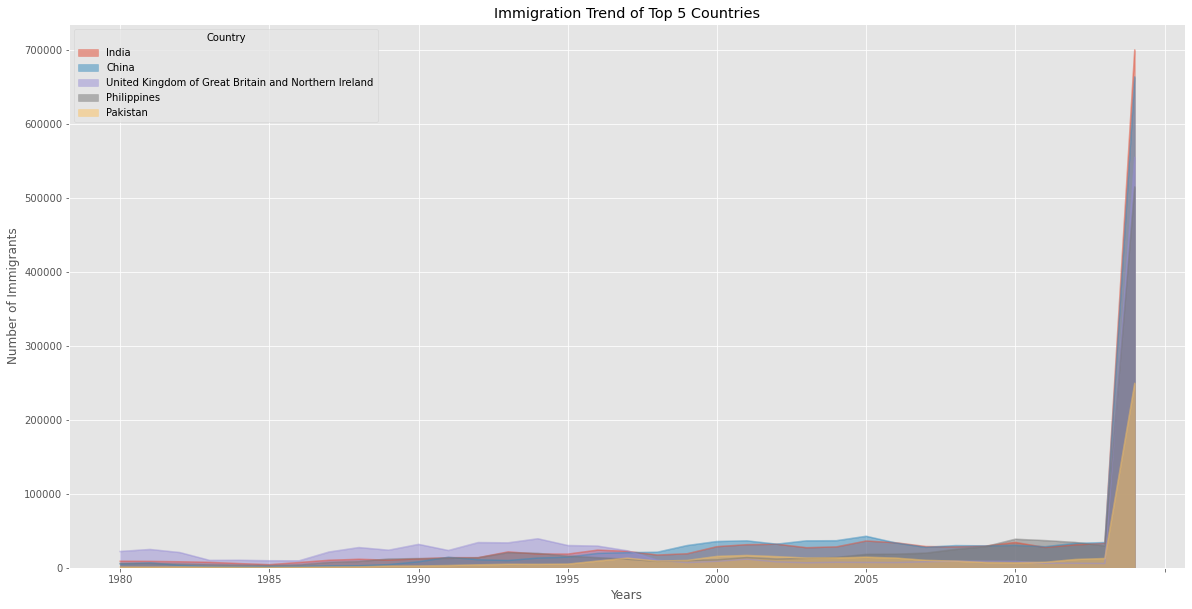

In [15]:
top_five_countries.plot(kind='area', stacked=False,figsize=(20, 10),)
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
#Becasuse the last row represents the total number og immigrants, we need to ignore it and replot the data

Text(0.5, 0, 'Years')

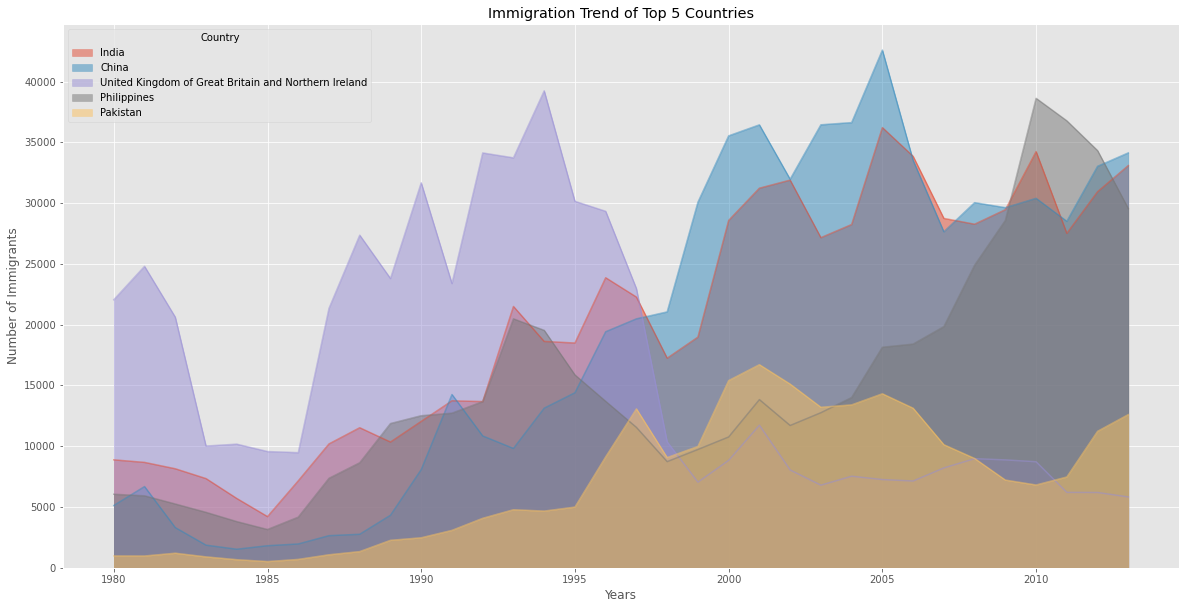

In [16]:
top_five_countries.iloc[:-1].plot(kind='area', stacked=False,figsize=(20, 10),)

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

Text(0.5, 0, 'Years')

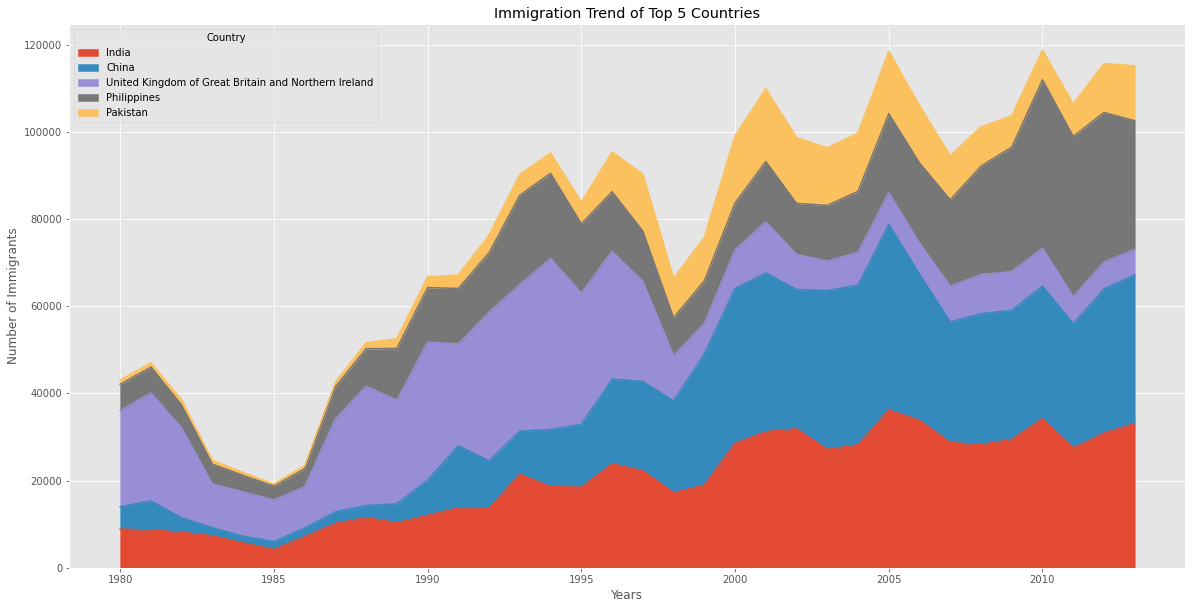

In [17]:
#This plot is stacked version of the previous plot, we change just the stacked parameter as True
top_five_countries.iloc[:-1].plot(kind='area', stacked=True,figsize=(20, 10),)
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

<font color="blue" >

Object oriented method:

Text(0.5, 0, 'Years')

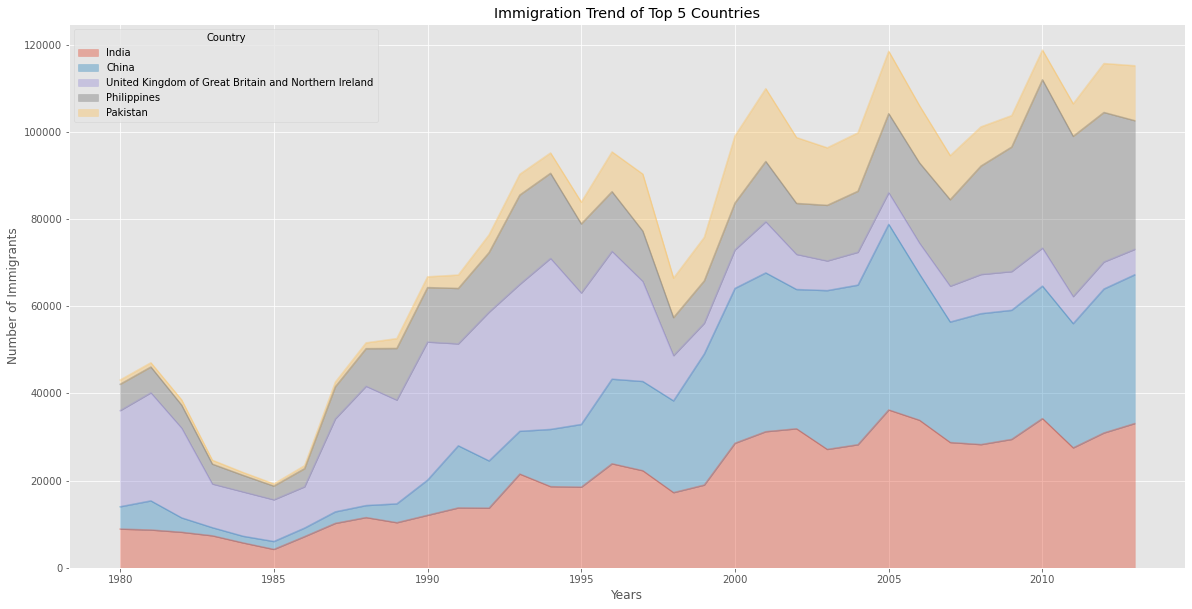

In [18]:
ax = top_five_countries.iloc[:-1].plot(kind='area', alpha=0.4, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

<font color="blue" >
 2.2. Histograms:
    
    A histogram is an approximate representation of the frequency distribution of numerical data.

In [19]:
df.drop(['Type',  'Coverage',      'AREA', 'Continent',       'REG',
          'Region',       'DEV',   'DevName'],axis=1, inplace=True)
#Because we will evaluate the immigration year by year in countries, we will drop unncessary columns
df.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,65977
Albania,1,0,0,0,0,0,1,2,2,3,...,1223,856,702,560,716,561,539,620,603,18433
Algeria,80,67,71,69,63,44,69,132,242,434,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,72156
American Samoa,0,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,2774
Andorra,0,0,0,0,0,0,2,0,0,0,...,0,1,1,0,0,0,0,1,1,2749


Text(0.5, 0, 'Number of Immigrants')

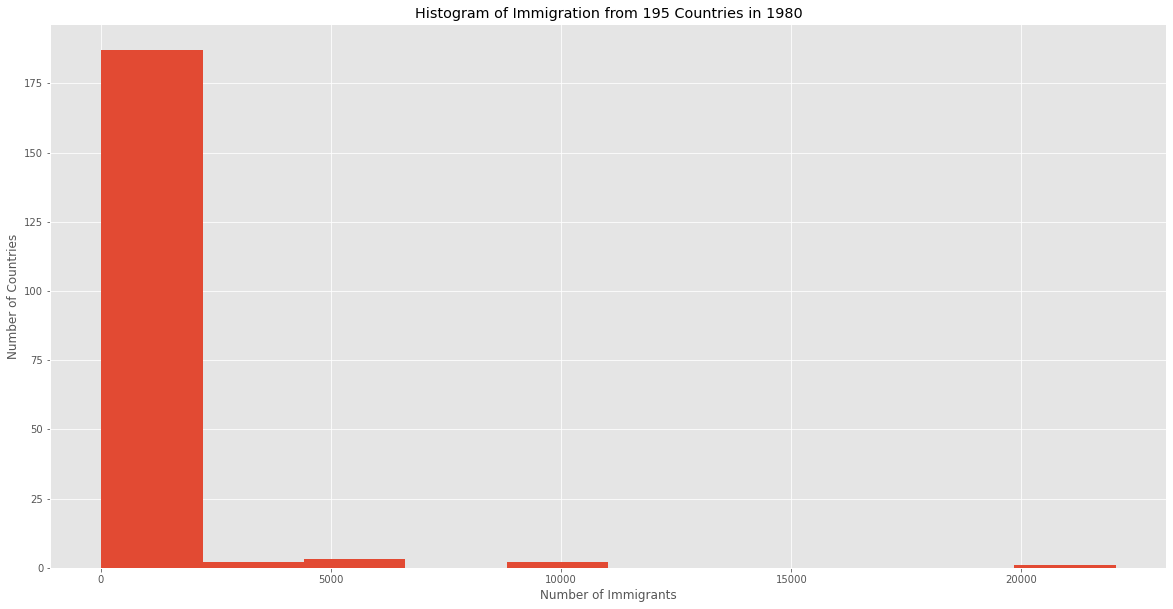

In [20]:
df[1980].plot(kind="hist",figsize=(20,10))
plt.title('Histogram of Immigration from 195 Countries in 1980') 
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')
#From this plot we see that there are few countries that give higher number immigrants to Canada

In [21]:
df[df[1980]>8000]
#Here we see these states that gives the highest number of immigrants to Canada

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,699242
United Kingdom of Great Britain and Northern Ireland,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,554233
United States of America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,243833


Text(0.5, 0, 'Number of Immigrants')

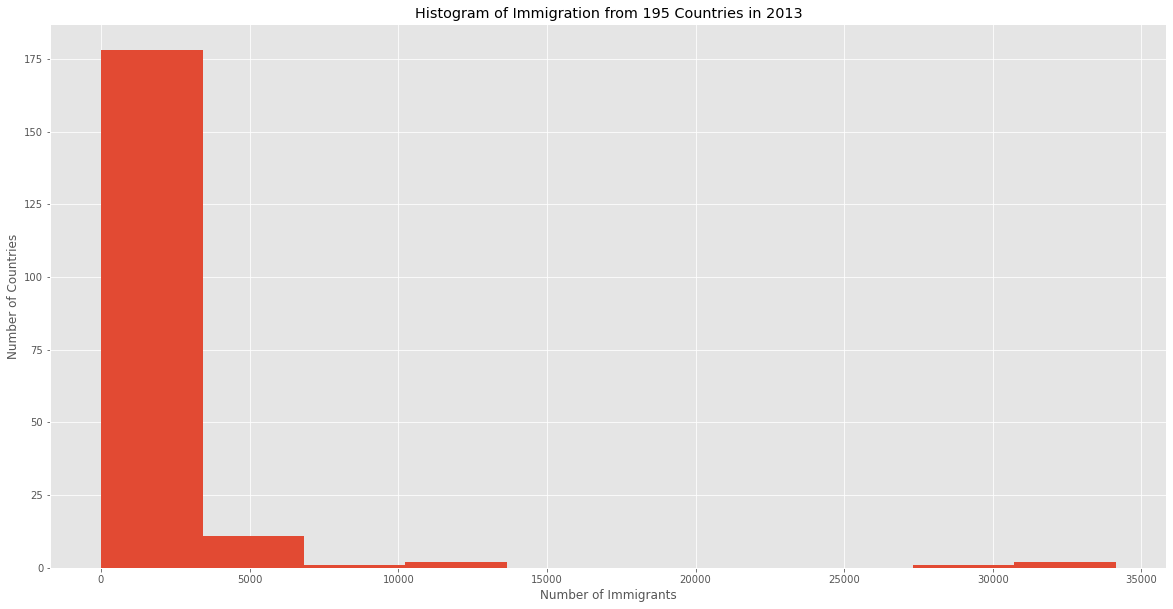

In [22]:
df[2013].plot(kind="hist",figsize=(20,10))
plt.title('Histogram of Immigration from 195 Countries in 2013') 
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')
#This trend continues to 2013

In [23]:
df[df[2013]>8000]
#however some of the countries like China and Iran emerges as the countries which gives the highest number of immigrants

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,662705
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,699242
Iran (Islamic Republic of),1172,1429,1822,1592,1977,1648,1794,2989,3273,3781,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,183261
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,248938
Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,514148
United States of America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,243833


Text(0.5, 0, 'Number of Immigrants')

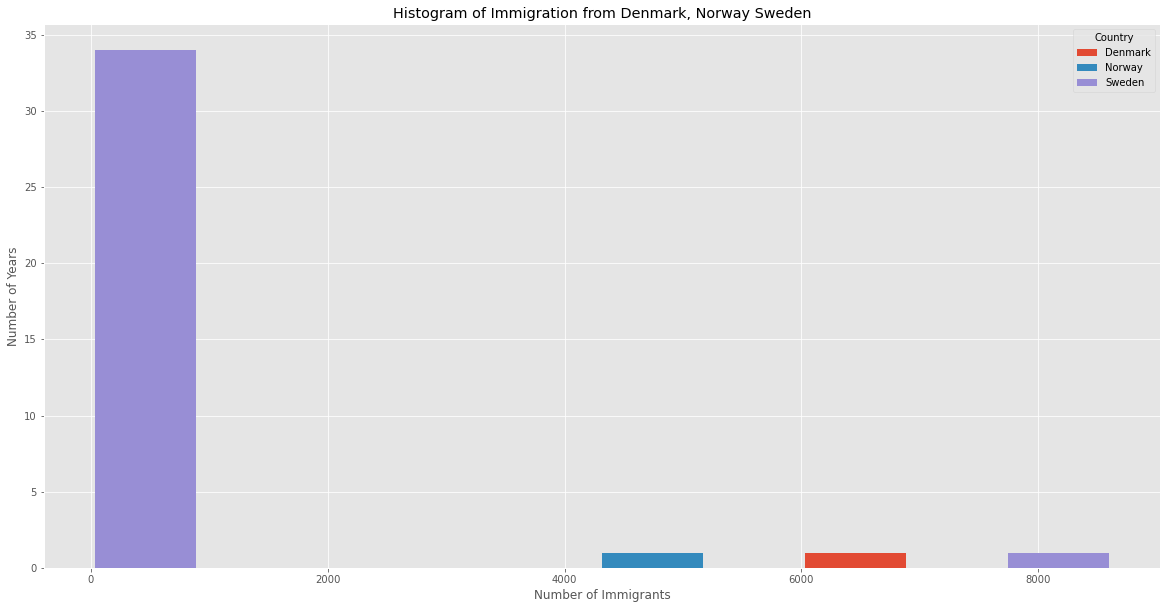

In [24]:
df.loc[['Denmark', 'Norway', 'Sweden']].transpose()[['Denmark', 'Norway', 'Sweden']].plot(kind="hist",figsize=(20,10))
plt.title('Histogram of Immigration from Denmark, Norway Sweden') 
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')


<font color="blue" >
    2.3. Bar Charts:
    
    A bar plot is a way of representing data where the length of the bars represents the magnitude/size of the feature/variable

To create a bar plot, we can pass one of two arguments via `kind` parameter in `plot()`:

-   `kind=bar` creates a _vertical_ bar plot:the x-axis is used for labelling, and the length of bars on the y-axis corresponds to the magnitude of the variable being measured.

-   `kind=barh` creates a _horizontal_ bar plot:the y-axis is used for labelling, and the length of bars on the x-axis corresponds to the magnitude of the variable being measured

In [25]:
df

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,65977
Albania,1,0,0,0,0,0,1,2,2,3,...,1223,856,702,560,716,561,539,620,603,18433
Algeria,80,67,71,69,63,44,69,132,242,434,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,72156
American Samoa,0,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,2774
Andorra,0,0,0,0,0,0,2,0,0,0,...,0,1,1,0,0,0,0,1,1,2749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,99903
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2719
Yemen,1,2,1,6,0,18,7,12,7,18,...,161,140,122,133,128,211,160,174,217,5744


Text(20, 3400, '2001 Terror Attacks')

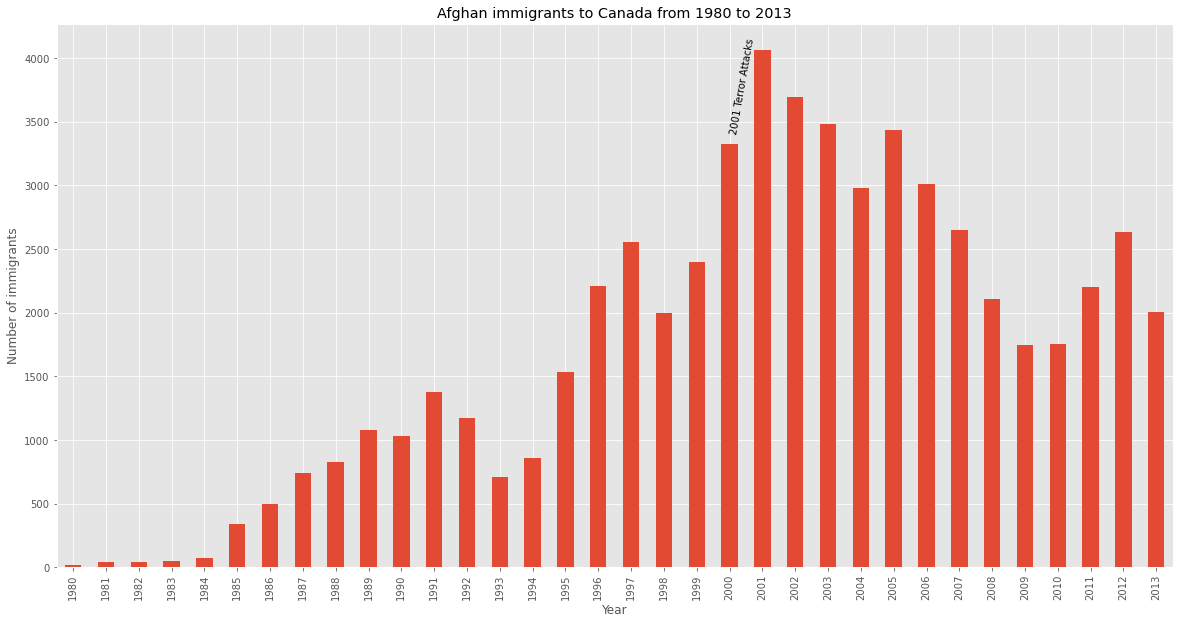

In [26]:
df.loc["Afghanistan"][:-1].plot(kind='bar', figsize=(20, 10))

plt.xlabel('Year') # add x_label
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Afghan immigrants to Canada from 1980 to 2013')

plt.annotate('2001 Terror Attacks', # text to display
             xy=(20, 3400),                    # start the text at at point (year 2000 , pop 50)
             rotation=80,                  
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )
#we see that the number of immigrants reached the peak after 2001 terror attacks

Text(0.5, 1.0, 'Afghan immigrants to Canada from 1980 to 2013')

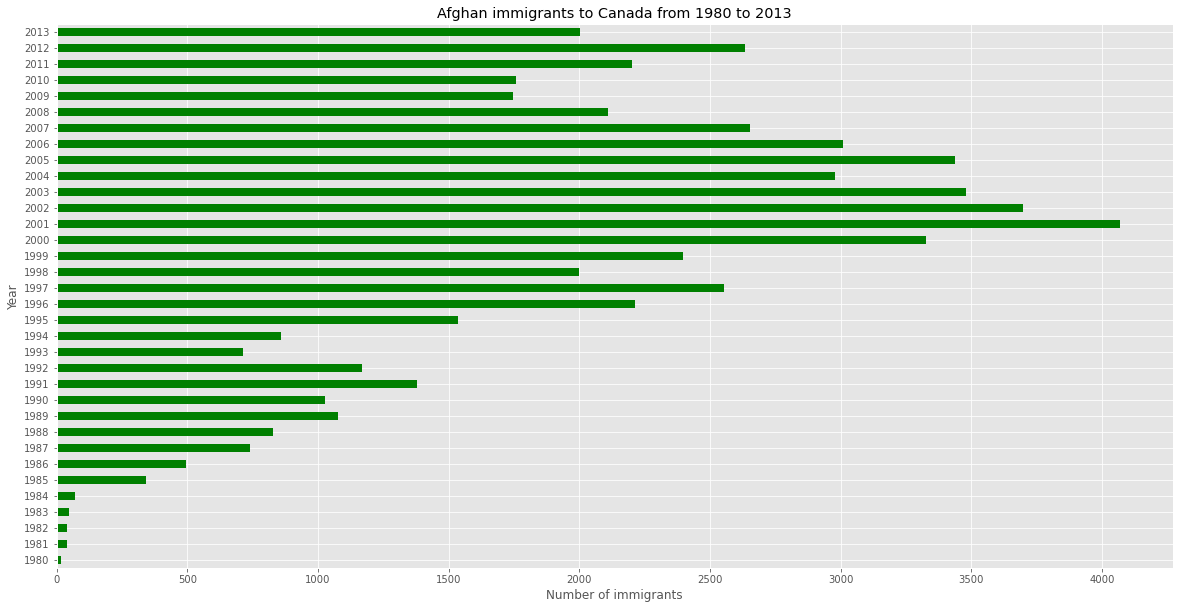

In [27]:
df.loc["Afghanistan"][:-1].plot(kind='barh', figsize=(20, 10), color="green")

plt.xlabel('Number of immigrants') # add x_label
plt.ylabel('Year') # add y-label to the plot
plt.title('Afghan immigrants to Canada from 1980 to 2013')

<font color="blue" >
    2.4. Pie Charts:

In [28]:
df_continent #This is our special dataframe that we groupby states by country column

,AREA,REG,DEV,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,48762,49242,48708,3951,4363,3819,2671,2639,2650,3782,...,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543
Asia,45815,109147,44197,31025,34314,30214,24696,27274,23850,28739,...,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075
Europe,39044,39754,38743,39760,44802,42720,24638,22287,20844,24370,...,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691
Latin America and the Caribbean,29832,30395,29766,13081,15215,16769,15427,13678,15171,21179,...,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950
Northern America,1810,1810,1802,9378,10030,9074,7100,6661,6543,7074,...,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503
Oceania,12726,13210,12626,1942,1839,1675,1018,878,920,904,...,1788,1585,1473,1693,1834,1860,1834,1548,1679,1775


In [29]:
df_continent["Total"]=df_continent.sum(axis=1)
df_continent

,AREA,REG,DEV,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,48762,49242,48708,3951,4363,3819,2671,2639,2650,3782,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,765660
Asia,45815,109147,44197,31025,34314,30214,24696,27274,23850,28739,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3516953
Europe,39044,39754,38743,39760,44802,42720,24638,22287,20844,24370,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1528488
Latin America and the Caribbean,29832,30395,29766,13081,15215,16769,15427,13678,15171,21179,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,855141
Northern America,1810,1810,1802,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,246564
Oceania,12726,13210,12626,1942,1839,1675,1018,878,920,904,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,93736


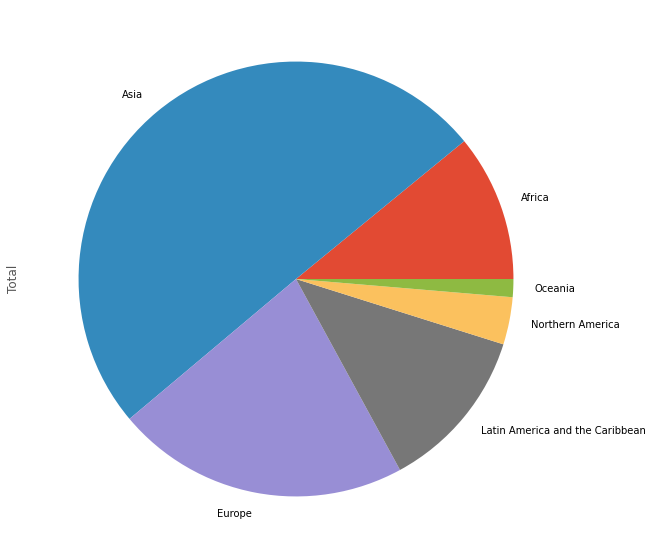

In [30]:
df_continent["Total"].plot(kind="pie",figsize=(20,10))

We will pass in `kind = 'pie'` keyword, along with the following additional parameters:

-   `autopct` -  is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be `fmt%pct`.
-   `startangle` - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
-   `shadow` - Draws a shadow beneath the pie (to give a 3D feel).


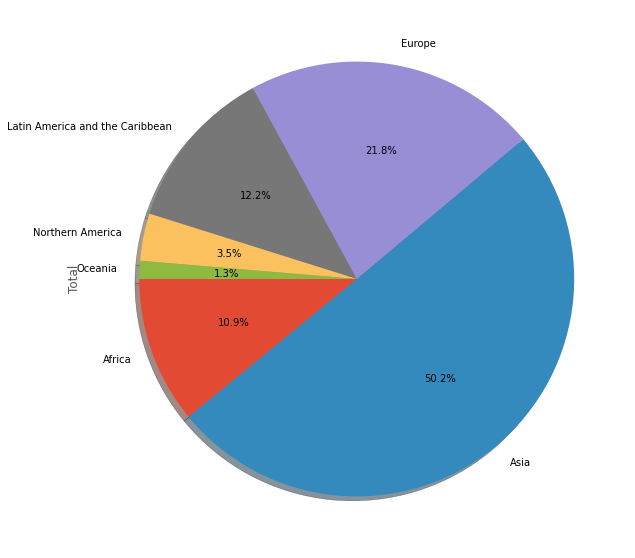

In [31]:
df_continent["Total"].plot(kind="pie",figsize=(20,10), 
                           autopct='%1.1f%%', # add in percentages
                           startangle=180,
                           shadow=True,       # add shadow  
                          )

-   Remove the text labels on the pie chart by passing in `legend` and add it as a seperate legend using `plt.legend()`.
-   Push out the percentages to sit just outside the pie chart by passing in `pctdistance` parameter.
-   Pass in a custom set of colors for continents by passing in `colors` parameter.
-   **Explode** the pie chart to emphasize the lowest three continents (Africa, North America, and Latin America and Carribbean) by pasing in `explode` parameter.

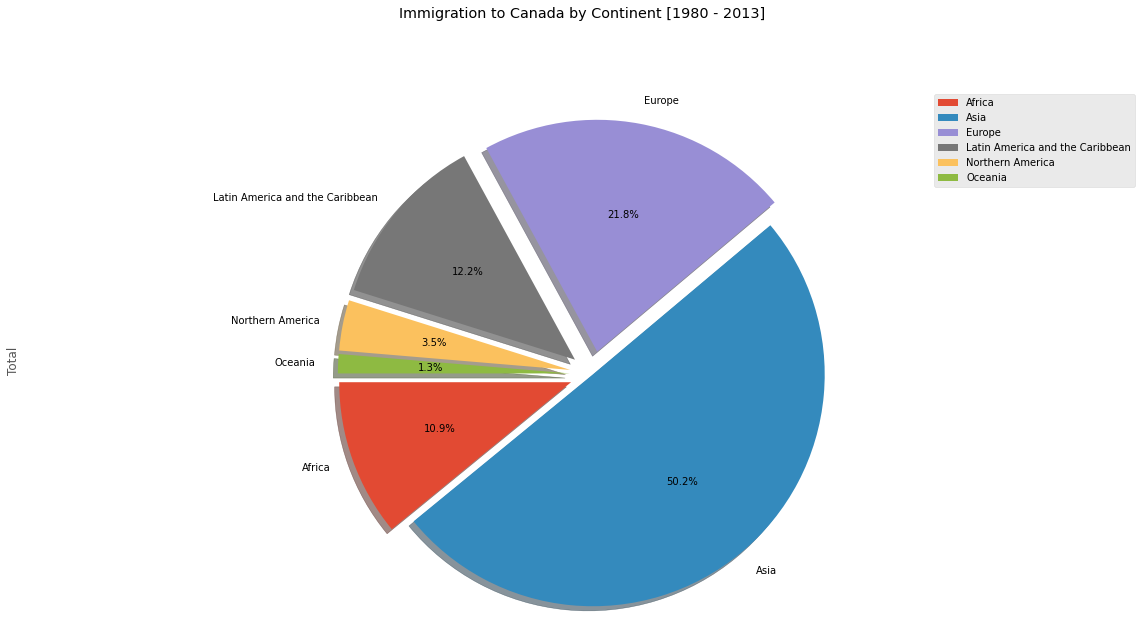

In [32]:
df_continent["Total"].plot(kind="pie",figsize=(20,10), 
                           autopct='%1.1f%%', # add in percentages
                           startangle=180,
                           shadow=True,       # add shadow  
                        explode=[0.1, 0, 0.1, 0.1, 0.1, 0.1]
                          )
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend()

<font color="blue" >
    2.5. Box Plots:

A `box plot` is a way of statistically representing the _distribution_ of the data through five main dimensions: 

-   **Minimun:** Smallest number in the dataset.
-   **First quartile:** Middle number between the `minimum` and the `median`.
-   **Second quartile (Median):** Middle number of the (sorted) dataset.
-   **Third quartile:** Middle number between `median` and `maximum`.
-   **Maximum:** Highest number in the dataset.

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/boxplot_complete.png" width=440, align="center">


In [33]:
df_continent.drop(["AREA","REG","DEV"],axis=1,inplace=True)
df_continent.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,765660
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3516953
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1528488
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,855141
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,246564


In [34]:
df_continent_2=df_continent.transpose()
df_continent_2

Continent,Africa,Asia,Europe,Latin America and the Caribbean,Northern America,Oceania
1980,3951,31025,39760,13081,9378,1942
1981,4363,34314,44802,15215,10030,1839
1982,3819,30214,42720,16769,9074,1675
1983,2671,24696,24638,15427,7100,1018
1984,2639,27274,22287,13678,6661,878
1985,2650,23850,20844,15171,6543,920
1986,3782,28739,24370,21179,7074,904
1987,7494,43203,46698,28471,7705,1200
1988,7552,47454,54726,21924,6469,1181
1989,9894,60256,60893,25060,6790,1539


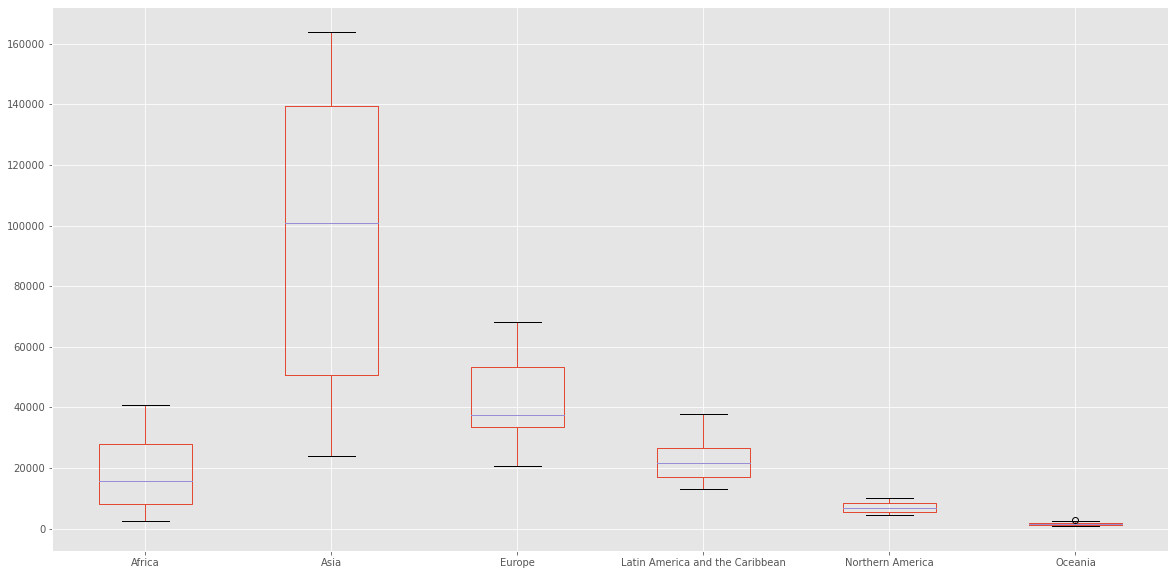

In [35]:
df_continent_2.iloc[:-1].plot(kind="box",figsize=(20,10)) 
#By using .iloc[] we exclude the total row becasuse it will cause unbalanced plot

<font color="blue">
    When we look at the continents, the Asia continent gives the highest number of imigrants with some details as follows:
    
    
1.  The minimum number of immigrants is around 25 000 (min), maximum number is around 170 000 (max), and  median number of immigrants is around 100 000 (median).
    
2.  25% of the years for period 1980 - 2013 had an annual immigrant count of ~55 000 or fewer (First quartile).
3.  75% of the years for period 1980 - 2013 had an annual immigrant count of ~140 000 or fewer (Third quartile).


In [36]:
df_continent_2.iloc[:-1]["Asia"].describe()
#We can see the actual numbers by calling the `describe()` method on the dataframe which is consistent with the boxplot

count        34.000000
mean      97582.176471
std       47352.634226
min       23850.000000
25%       50654.500000
50%      100883.500000
75%      139333.750000
max      163845.000000
Name: Asia, dtype: float64

<font color="blue" >
    2.6. Scatter Plots:

In [37]:
df2=df.transpose()
#We will add a new column in order to show total number of immigrants per year
df2.head()

Country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
1980,16,1,80,0,0,1,0,368,0,702,...,9378,128,0,0,103,1191,0,1,11,72
1981,39,0,67,1,0,3,0,426,0,639,...,10030,132,0,0,117,1829,0,2,17,114
1982,39,0,71,0,0,6,0,626,0,484,...,9074,146,0,0,174,2162,0,1,11,102
1983,47,0,69,0,0,6,0,241,0,317,...,7100,105,0,0,124,3404,0,6,7,44
1984,71,0,63,0,0,4,42,237,0,317,...,6661,90,0,0,142,7583,0,0,16,32


In [38]:
df2["Total Immigrants per Year"]=df2.sum(axis=1)
df2.head()

Country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe,Total Immigrants per Year
1980,16,1,80,0,0,1,0,368,0,702,...,128,0,0,103,1191,0,1,11,72,99137
1981,39,0,67,1,0,3,0,426,0,639,...,132,0,0,117,1829,0,2,17,114,110563
1982,39,0,71,0,0,6,0,626,0,484,...,146,0,0,174,2162,0,1,11,102,104271
1983,47,0,69,0,0,6,0,241,0,317,...,105,0,0,124,3404,0,6,7,44,75550
1984,71,0,63,0,0,4,42,237,0,317,...,90,0,0,142,7583,0,0,16,32,73417


In [39]:
df= df2.transpose()
df# Here we added the total year row and recreated out data frame

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,65977
Albania,1,0,0,0,0,0,1,2,2,3,...,1223,856,702,560,716,561,539,620,603,18433
Algeria,80,67,71,69,63,44,69,132,242,434,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,72156
American Samoa,0,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,2774
Andorra,0,0,0,0,0,0,2,0,0,0,...,0,1,1,0,0,0,0,1,1,2749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2719
Yemen,1,2,1,6,0,18,7,12,7,18,...,161,140,122,133,128,211,160,174,217,5744
Zambia,11,17,11,7,16,9,15,23,44,68,...,91,77,71,64,60,102,69,46,59,4392


In [40]:
years=[   1980,    1981,    1982,    1983,    1984,    1985,    1986,    1987,
          1988,    1989,    1990,    1991,    1992,    1993,    1994,    1995,
          1996,    1997,    1998,    1999,    2000,    2001,    2002,    2003,
          2004,    2005,    2006,    2007,    2008,    2009,    2010,    2011,
          2012,    2013]

Text(0, 0.5, 'Number of Immigrants')

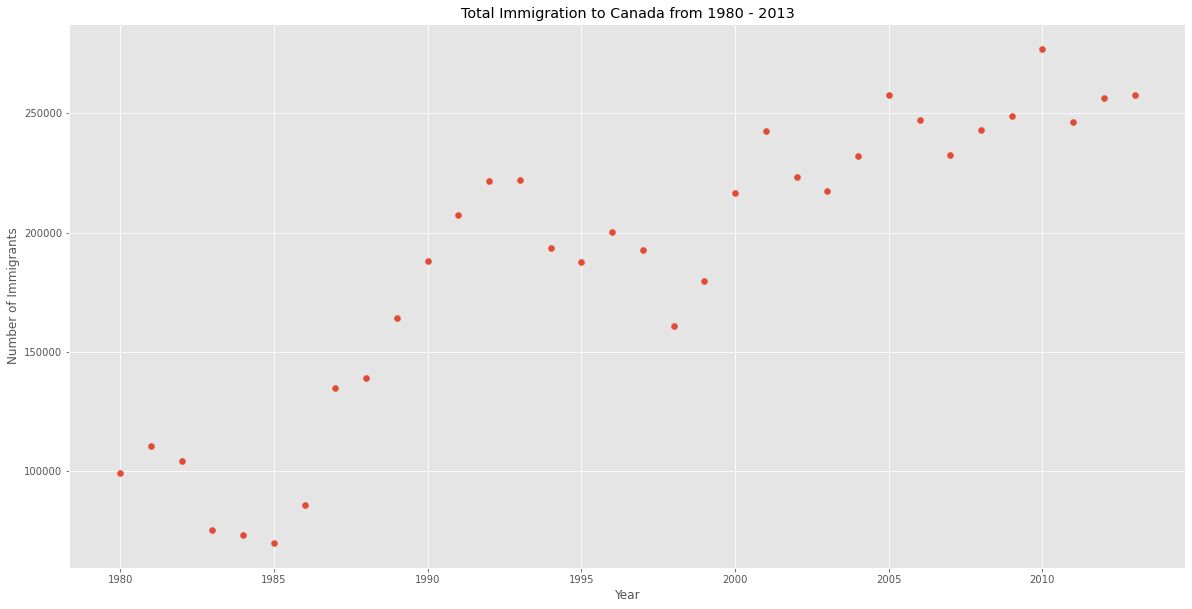

In [41]:
plt.figure(figsize=(20,10))
plt.scatter(x=years, y=df.iloc[-1][:-1])

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
#There is a trend that the years go by, the total number of immigrants increases

We can plot a linear line of best fit, and use it to  predict the number of immigrants in 2015 by using **Numpy**'s `polyfit()` method by passing in the following:

-   `x`: x-coordinates of the data. 
-   `y`: y-coordinates of the data. 
-   `deg`: Degree of fitting polynomial. 1 = linear, 2 = quadratic, and so on.

In [42]:
x = years      # year on x-axis
y = df.iloc[-1][:-1]    # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit


array([ 5.56709228e+03, -1.09261952e+07])

The output is an array with the polynomial coefficients, highest powers first. Since we are plotting a linear regression `y= a*x + b`, our output has 2 elements `[5.56709228e+03, -1.09261952e+07]` with the the slope in position 0 and intercept in position 1. 

In [43]:
import seaborn as sns

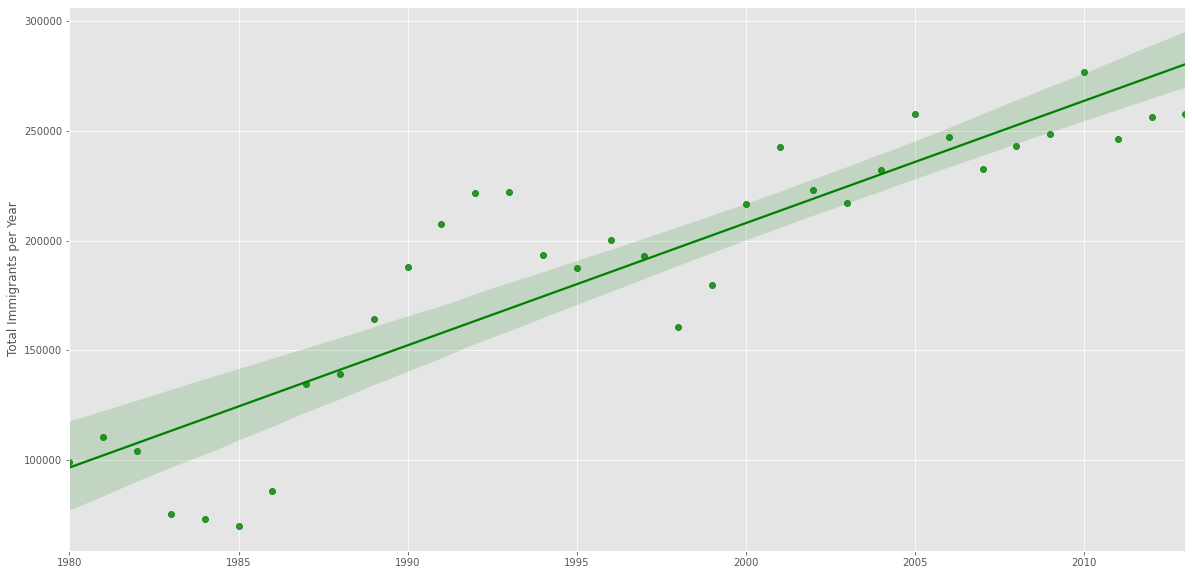

In [44]:
plt.figure(figsize=(20,10))
sns.regplot(x,y, data=df,color="green")# We can also get the regression line via seaborn regplot


<font color="blue" >
    2.7. Bubble Plots: